<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/Microsoft_Stock_Forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and preproccesing Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("MSFT.csv")
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.060657   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062823   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063907   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.062281   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061198   
...          ...         ...         ...         ...         ...         ...   
9362  2023-05-05  305.720001  311.970001  304.269989  310.649994  310.649994   
9363  2023-05-08  310.130005  310.200012  306.089996  308.649994  308.649994   
9364  2023-05-09  308.000000  310.040009  306.309998  307.000000  307.000000   
9365  2023-05-10  308.619995  313.000000  307.670013  312.309998  312.309998   
9366  2023-05-11  310.100006  311.119995  306.260010  310.109985  310.109985   

          Volume  
0     1031788800  
1

In [4]:
df = df[["Date", "Close"]]
print(df)

            Date       Close
0     1986-03-13    0.097222
1     1986-03-14    0.100694
2     1986-03-17    0.102431
3     1986-03-18    0.099826
4     1986-03-19    0.098090
...          ...         ...
9362  2023-05-05  310.649994
9363  2023-05-08  308.649994
9364  2023-05-09  307.000000
9365  2023-05-10  312.309998
9366  2023-05-11  310.109985

[9367 rows x 2 columns]


In [7]:
import datetime
def str_to_datetime(s):
  split = s.split("-")
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
df["Date"] = df["Date"].apply(str_to_datetime)


<ipython-input-7-d3419f67a08c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9362   2023-05-05
9363   2023-05-08
9364   2023-05-09
9365   2023-05-10
9366   2023-05-11
Name: Date, Length: 9367, dtype: datetime64[ns]

In [8]:
df.index = df.pop("Date")
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-05-05,310.649994
2023-05-08,308.649994
2023-05-09,307.000000


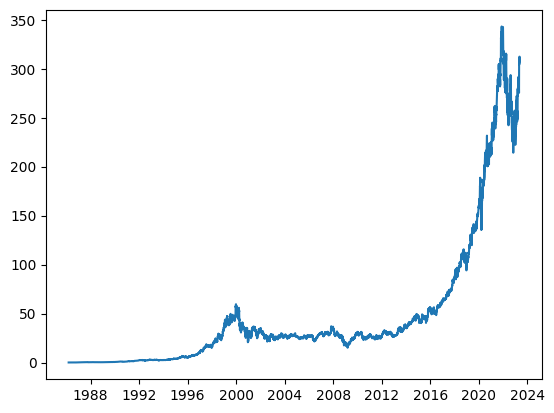

In [11]:
plt.plot(df.index, df['Close'])